# Deep learning spotify datasets

This dataset is the spotify.csv dataset taken from Kaggle. 
Data source - https://www.kaggle.com/mrmorj/dataset-of-songs-in-spotify .
Download data from - https://drive.google.com/file/d/1yqNuJH3_eCwm_BnxwjOiW91cppMtkBs6/view?usp=sharing .
I would like to analyse various aspects of this dataset to understand relationships between various numeric features and track_popularity scores.
Finally I would like to apply lessons I learned from the intro to deep learning course in Kaggle.
Link to course : https://www.kaggle.com/learn/intro-to-deep-learning .

In [85]:
#Loading packages for basic data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [86]:
#Let us read the datafile with proper indexing
spotify = pd.read_csv("spotify.csv", index_col=0)

In [87]:
#Let us print the first few rows
spotify.head(4)

,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093


In [88]:
#Description of the columns having numeric values
spotify.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [89]:
#Check all column names
spotify.columns

Index(['track_name', 'track_artist', 'track_popularity', 'track_album_id',
       'track_album_name', 'track_album_release_date', 'playlist_name',
       'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

### Now we will convert the data in a column to list. An extremely important step in analysing datasets

In [90]:
track_popularity_data=spotify.track_popularity.tolist()

## Analyzing the data using a few plots

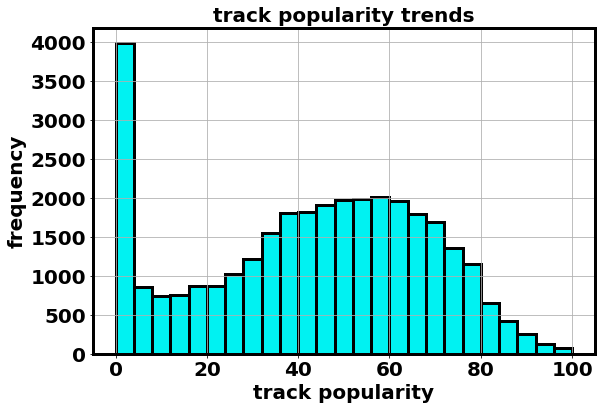

In [91]:
#Histogram of track_popularity
clr=[0,0.95,.95]
plt.grid()
plt.hist(track_popularity_data,25,facecolor=clr,edgecolor='k',linewidth=3)
plt.xlabel("track popularity", fontsize=20, fontweight='bold')
plt.ylabel("frequency", fontsize=20, fontweight='bold')
plt.title("track popularity trends", fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.gcf().set_size_inches(9, 6)
plt.show()

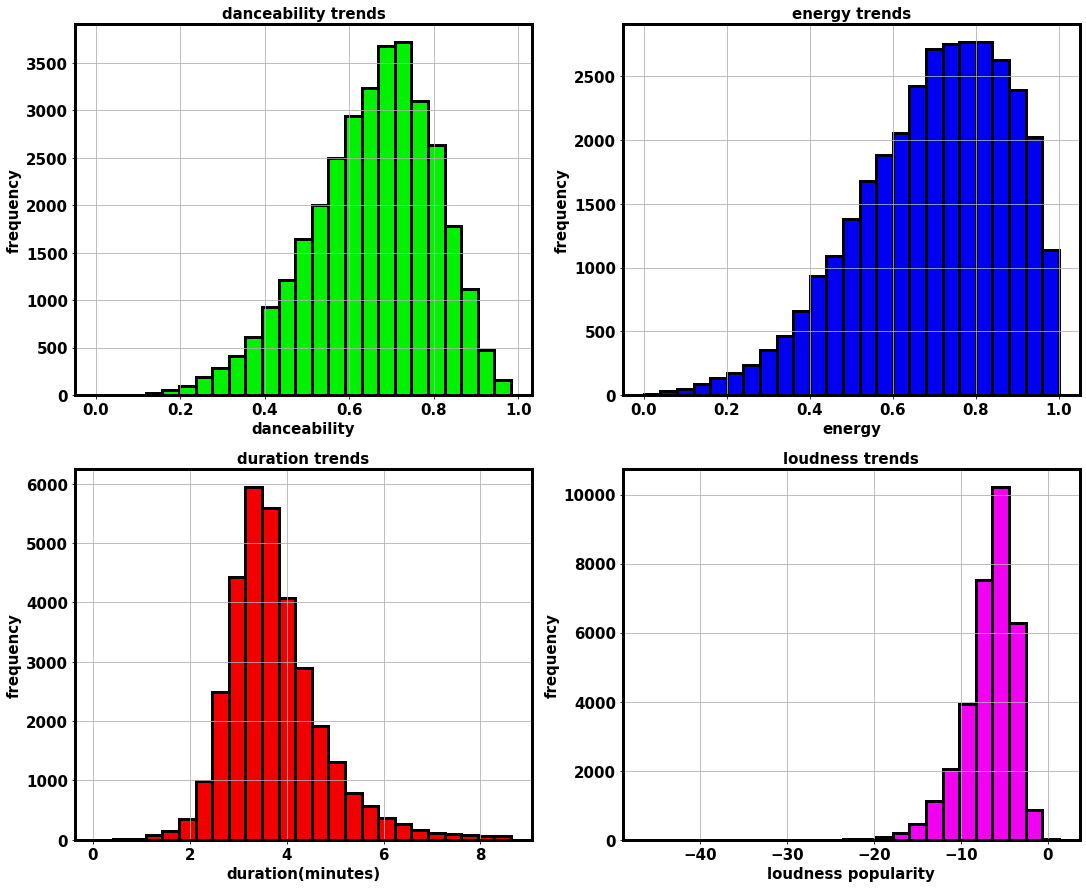

In [92]:
#We will plot histograms of a few more features as subplots
danceability_data=spotify.danceability.tolist()
energy_data=spotify.energy.tolist()
duration_ms_data=spotify.duration_ms.tolist()
loudness_data=spotify.loudness.tolist()

clr1=[0,0.95,0]
clr2=[0,0,.95]
clr3=[0.95,0,0]
clr4=[0.95,0,.95]

fs=15 #fontsize

plt.subplot(2,2,1)
plt.grid()
plt.hist(danceability_data,25,facecolor=clr1,edgecolor='k',linewidth=3)
plt.xlabel("danceability", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("danceability trends", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
#plt.gcf().set_size_inches(7, 4)


plt.subplot(2,2,2)
plt.grid()
plt.hist(energy_data,25,facecolor=clr2,edgecolor='k',linewidth=3)
plt.xlabel("energy", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("energy trends", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
#plt.gcf().set_size_inches(7, 4)



plt.subplot(2,2,3)
plt.grid()
plt.hist(duration_ms_data,25,facecolor=clr3,edgecolor='k',linewidth=3)
plt.xlabel("duration(minutes)", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("duration trends", fontsize=fs, fontweight='bold')
plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
#plt.gcf().set_size_inches(7, 4)



plt.subplot(2,2,4)
plt.grid()
plt.hist(loudness_data,25,facecolor=clr4,edgecolor='k',linewidth=3)
plt.xlabel("loudness popularity", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("loudness trends", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
#plt.gcf().set_size_inches(7, 4)



plt.gcf().set_size_inches(18, 15)
plt.show()


## Converting more data to lists

In [93]:
key_data=spotify.key.tolist()
speechiness_data=spotify.speechiness.tolist()
acousticness_data=spotify.acousticness.tolist()
instrumentalness_data=spotify.instrumentalness.tolist()

liveness_data=spotify.liveness.tolist()
valence_data=spotify.valence.tolist()
tempo_data=spotify.tempo.tolist()
mode_data=spotify['mode'].tolist()

## Let us analyze the correlation between different features

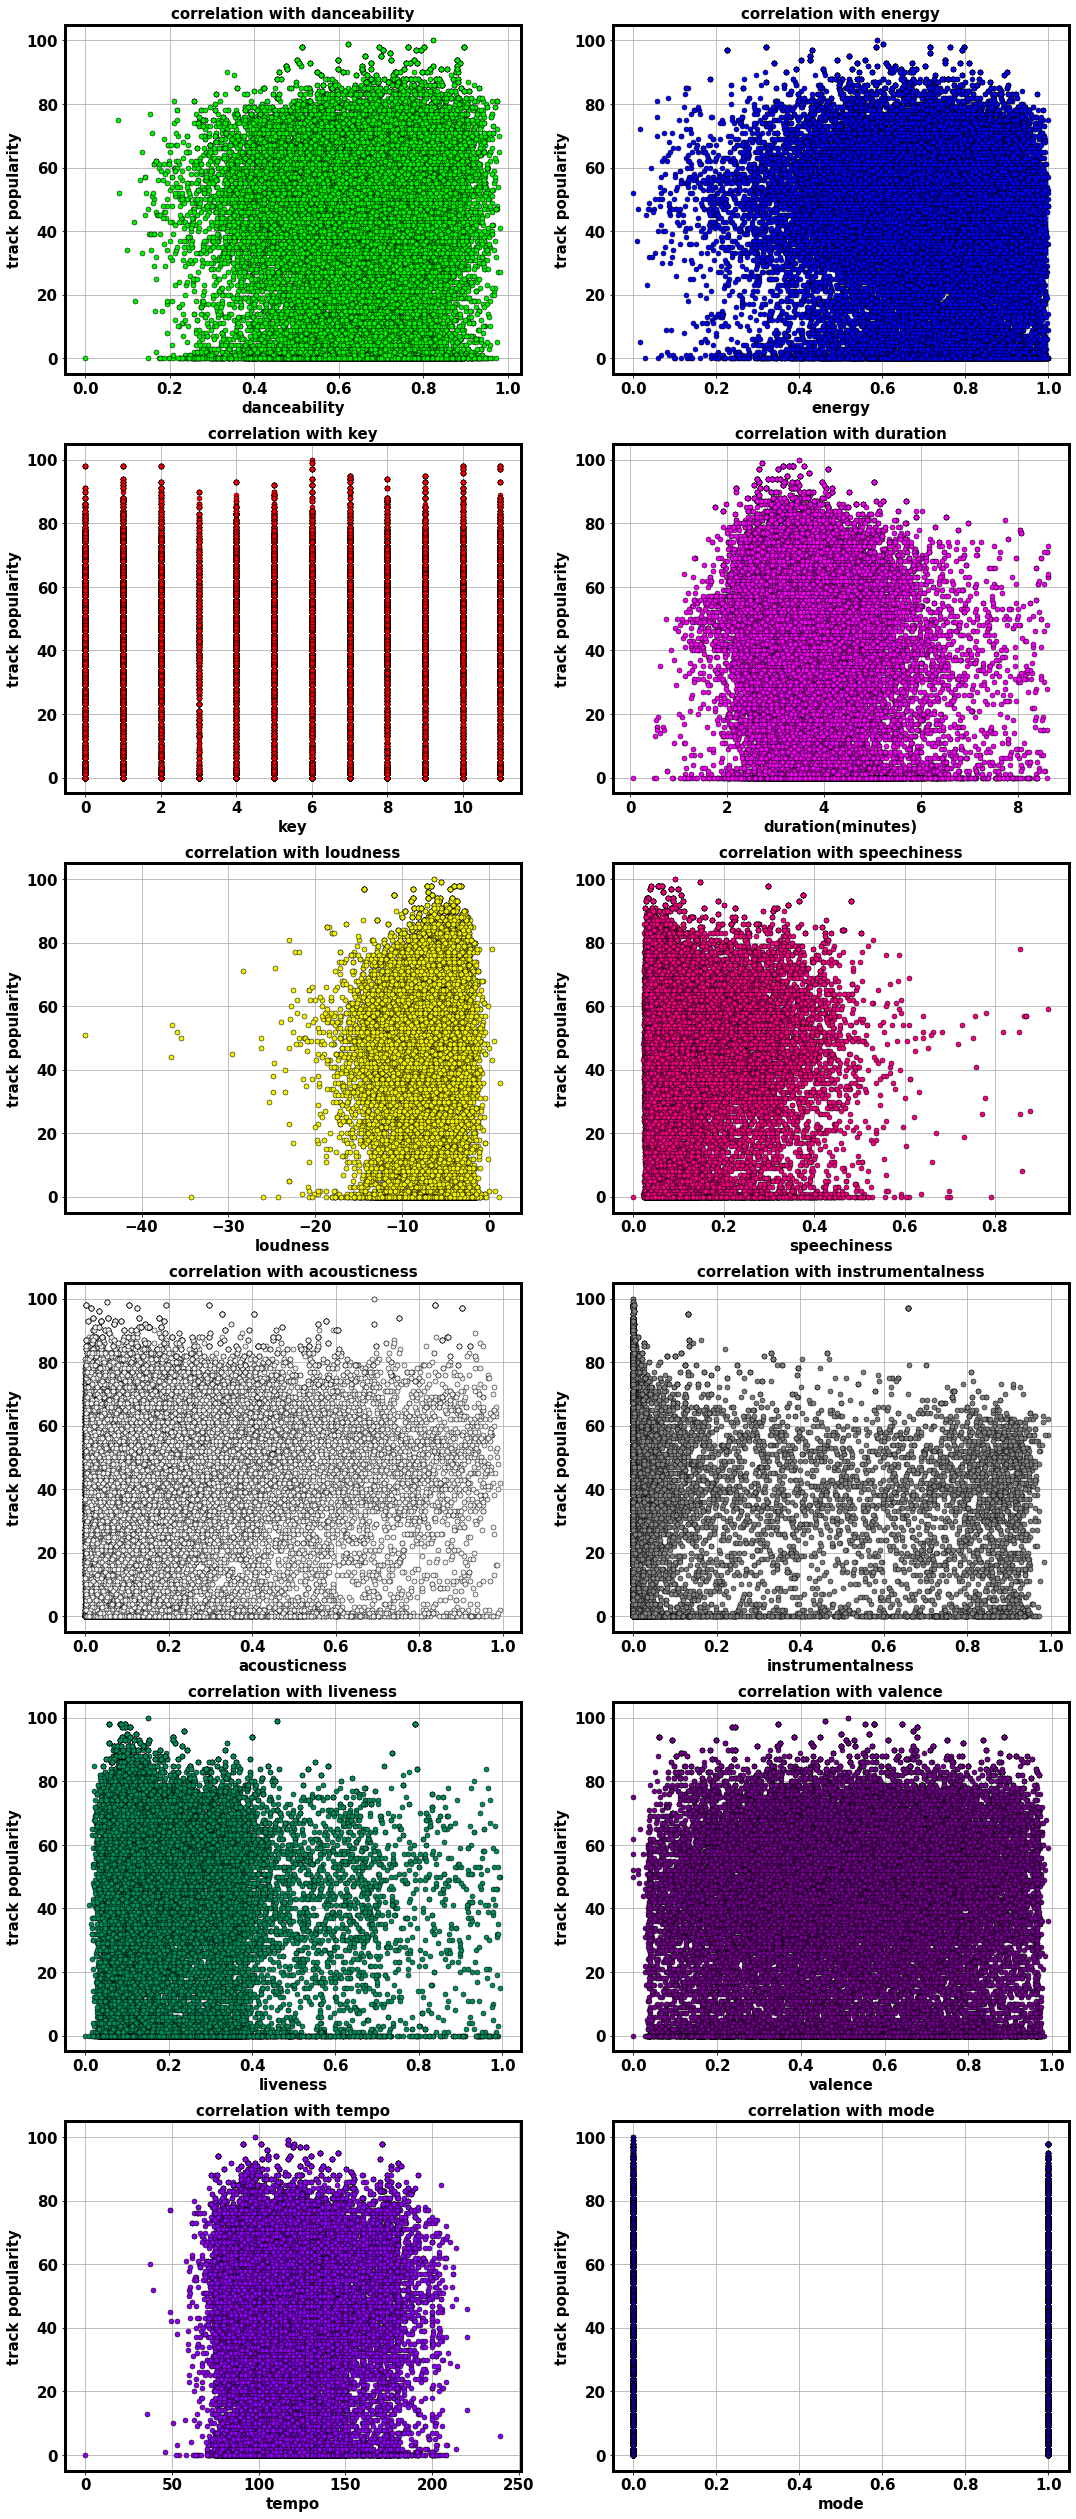

In [94]:
#This plot will explicitly check positive or negative correlation of different features with popularity
clr1=[0,0.95,0]
clr2=[0,0,.95]
clr3=[0.95,0,0]
clr4=[0.95,0,.95]

clr5=[0.95,0.95,0]
clr6=[0.95,0,0.5]
clr7=[0.95,0.95,0.95]
clr8=[0.5,0.5,.5]


clr9=[0,0.55,0.35]
clr10=[0.45,0,.55]
clr11=[0.55,0,0.95]
clr12=[0.05,0,.55]

fs=15 #fontsize

plt.subplot(6,2,1)
plt.grid()
plt.plot(danceability_data, track_popularity_data,'mo', markersize=5, markerfacecolor=clr1,markeredgewidth=0.5,  markeredgecolor='k')
plt.xlabel("danceability", fontsize=fs, fontweight='bold')
plt.ylabel("track popularity", fontsize=fs, fontweight='bold')
plt.title("correlation with danceability", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(6,2,2)
plt.grid()
plt.plot(energy_data, track_popularity_data,'mo', markersize=5, markerfacecolor=clr2,markeredgewidth=0.5,  markeredgecolor='k')
plt.xlabel("energy", fontsize=fs, fontweight='bold')
plt.ylabel("track popularity", fontsize=fs, fontweight='bold')
plt.title("correlation with energy", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(6,2,3)
plt.grid()
plt.plot(key_data, track_popularity_data,'mo', markersize=5, markerfacecolor=clr3,markeredgewidth=0.5,  markeredgecolor='k')
plt.xlabel("key", fontsize=fs, fontweight='bold')
plt.ylabel("track popularity", fontsize=fs, fontweight='bold')
plt.title("correlation with key", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(6,2,4)
plt.grid()
plt.plot(duration_ms_data, track_popularity_data,'mo', markersize=5, markerfacecolor=clr4,markeredgewidth=0.5,  markeredgecolor='k')
plt.xlabel("duration(minutes)", fontsize=fs, fontweight='bold')
plt.ylabel("track popularity", fontsize=fs, fontweight='bold')
plt.title("correlation with duration", fontsize=fs, fontweight='bold')
plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.subplot(6,2,5)
plt.grid()
plt.plot(loudness_data, track_popularity_data,'mo', markersize=5, markerfacecolor=clr5,markeredgewidth=0.5,  markeredgecolor='k')
plt.xlabel("loudness", fontsize=fs, fontweight='bold')
plt.ylabel("track popularity", fontsize=fs, fontweight='bold')
plt.title("correlation with loudness", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(6,2,6)
plt.grid()
plt.plot(speechiness_data, track_popularity_data,'mo', markersize=5, markerfacecolor=clr6,markeredgewidth=0.5,  markeredgecolor='k')
plt.xlabel("speechiness", fontsize=fs, fontweight='bold')
plt.ylabel("track popularity", fontsize=fs, fontweight='bold')
plt.title("correlation with speechiness", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(6,2,7)
plt.grid()
plt.plot(acousticness_data, track_popularity_data,'mo', markersize=5, markerfacecolor=clr7,markeredgewidth=0.5,  markeredgecolor='k')
plt.xlabel("acousticness", fontsize=fs, fontweight='bold')
plt.ylabel("track popularity", fontsize=fs, fontweight='bold')
plt.title("correlation with acousticness", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.subplot(6,2,8)
plt.grid()
plt.plot(instrumentalness_data, track_popularity_data,'mo', markersize=5, markerfacecolor=clr8,markeredgewidth=0.5,  markeredgecolor='k')
plt.xlabel("instrumentalness", fontsize=fs, fontweight='bold')
plt.ylabel("track popularity", fontsize=fs, fontweight='bold')
plt.title("correlation with instrumentalness", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.subplot(6,2,9)
plt.grid()
plt.plot(liveness_data, track_popularity_data,'mo', markersize=5, markerfacecolor=clr9,markeredgewidth=0.5,  markeredgecolor='k')
plt.xlabel("liveness", fontsize=fs, fontweight='bold')
plt.ylabel("track popularity", fontsize=fs, fontweight='bold')
plt.title("correlation with liveness", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.subplot(6,2,10)
plt.grid()
plt.plot(valence_data, track_popularity_data,'mo', markersize=5, markerfacecolor=clr10,markeredgewidth=0.5,  markeredgecolor='k')
plt.xlabel("valence", fontsize=fs, fontweight='bold')
plt.ylabel("track popularity", fontsize=fs, fontweight='bold')
plt.title("correlation with valence", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.subplot(6,2,11)
plt.grid()
plt.plot(tempo_data, track_popularity_data,'mo', markersize=5, markerfacecolor=clr11,markeredgewidth=0.5,  markeredgecolor='k')
plt.xlabel("tempo", fontsize=fs, fontweight='bold')
plt.ylabel("track popularity", fontsize=fs, fontweight='bold')
plt.title("correlation with tempo", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(6,2,12)
plt.grid()
plt.plot(mode_data, track_popularity_data,'mo', markersize=5, markerfacecolor=clr12,markeredgewidth=0.5,  markeredgecolor='k')
plt.xlabel("mode", fontsize=fs, fontweight='bold')
plt.ylabel("track popularity", fontsize=fs, fontweight='bold')
plt.title("correlation with mode", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)



plt.gcf().set_size_inches(18, 45)
plt.show()

In [75]:
#So we see that the trends of different features are not at all clear and clearly not linear
#So we try using different versions of deep learning models to see the effects of adding or modifying different features on the 
#predictability

In [99]:
#List of all numeric columns
clnum1=spotify.select_dtypes(include=np.number).columns.tolist()

In [100]:
clnum1

['track_popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [101]:
#Choosing only numeric data
spotify_numeric=pd.read_csv("spotify.csv", usecols = spotify.select_dtypes(include=np.number).columns.tolist())
#Let us print the first few rows
spotify_numeric.head(4)

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093


In [102]:
# Create training and validation splits
df_train = spotify_numeric.sample(frac=0.7, random_state=0)
df_valid = spotify_numeric.drop(df_train.index)
display(df_train.head(4)) #displaying some of the chosen data for training

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('track_popularity', axis=1)
X_valid = df_valid.drop('track_popularity', axis=1)
y_train = df_train['track_popularity']
y_valid = df_valid['track_popularity']

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
31034,5,0.653,0.829,10,-4.783,1,0.0377,0.000739,0.000002,0.225,0.5450,124.989,263890
23457,79,0.752,0.505,9,-7.621,1,0.2530,0.535000,0.000003,0.104,0.4190,91.970,197437
10726,38,0.818,0.431,0,-11.846,1,0.2010,0.003450,0.872000,0.133,0.0786,130.022,156996
19148,58,0.806,0.738,2,-4.750,1,0.1620,0.221000,0.001100,0.156,0.8080,176.098,273160


In [103]:
print(X_train.shape)

(22983, 12)


In [107]:
#choosing something like ~1500 neurons
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[12]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [108]:
#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

In [109]:
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
90/90 [==============================] - 2s 13ms/step - loss: 0.2111 - val_loss: 0.2015
Epoch 2/10
90/90 [==============================] - 1s 11ms/step - loss: 0.1999 - val_loss: 0.2018
Epoch 3/10
90/90 [==============================] - 1s 10ms/step - loss: 0.1989 - val_loss: 0.2006
Epoch 4/10
90/90 [==============================] - 1s 10ms/step - loss: 0.1992 - val_loss: 0.2008
Epoch 5/10
90/90 [==============================] - 1s 10ms/step - loss: 0.1982 - val_loss: 0.1997
Epoch 6/10
90/90 [==============================] - 1s 11ms/step - loss: 0.1974 - val_loss: 0.2029
Epoch 7/10
90/90 [==============================] - 1s 12ms/step - loss: 0.1982 - val_loss: 0.1988
Epoch 8/10
90/90 [==============================] - 1s 11ms/step - loss: 0.1964 - val_loss: 0.2012
Epoch 9/10
90/90 [==============================] - 1s 10ms/step - loss: 0.1981 - val_loss: 0.2004
Epoch 10/10
90/90 [==============================] - 1s 11ms/step - loss: 0.1971 - val_loss: 0.2016


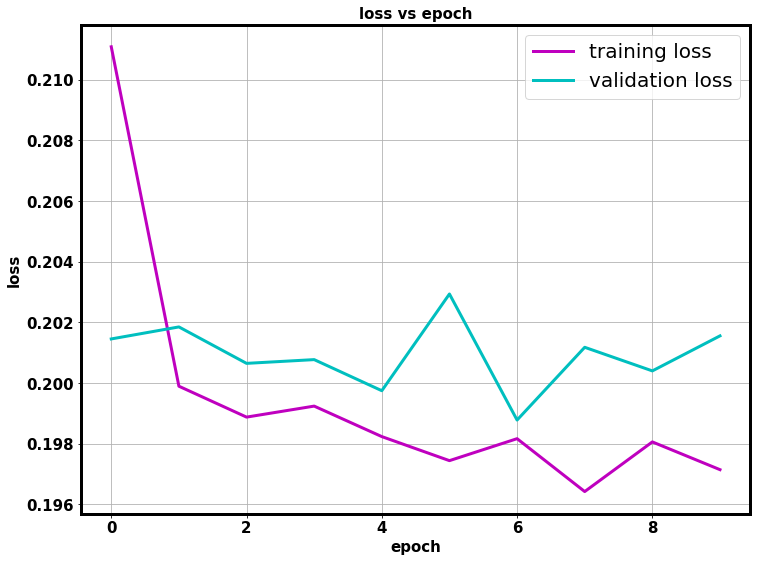

In [132]:
#Plotting the loss
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.gcf().set_size_inches(12, 9)

Epoch 1/10
180/180 [==============================] - 1s 7ms/step - loss: 0.1916 - val_loss: 0.1976
Epoch 2/10
180/180 [==============================] - 1s 6ms/step - loss: 0.1909 - val_loss: 0.1973
Epoch 3/10
180/180 [==============================] - 1s 6ms/step - loss: 0.1906 - val_loss: 0.1975
Epoch 4/10
180/180 [==============================] - 1s 6ms/step - loss: 0.1898 - val_loss: 0.1984
Epoch 5/10
180/180 [==============================] - 1s 6ms/step - loss: 0.1902 - val_loss: 0.1978
Epoch 6/10
180/180 [==============================] - 1s 6ms/step - loss: 0.1897 - val_loss: 0.1974
Epoch 7/10
180/180 [==============================] - 1s 6ms/step - loss: 0.1889 - val_loss: 0.1981
Epoch 8/10
180/180 [==============================] - 1s 6ms/step - loss: 0.1878 - val_loss: 0.1991
Epoch 9/10
180/180 [==============================] - 1s 6ms/step - loss: 0.1872 - val_loss: 0.1975
Epoch 10/10
180/180 [==============================] - 1s 6ms/step - loss: 0.1873 - val_loss: 0.1970

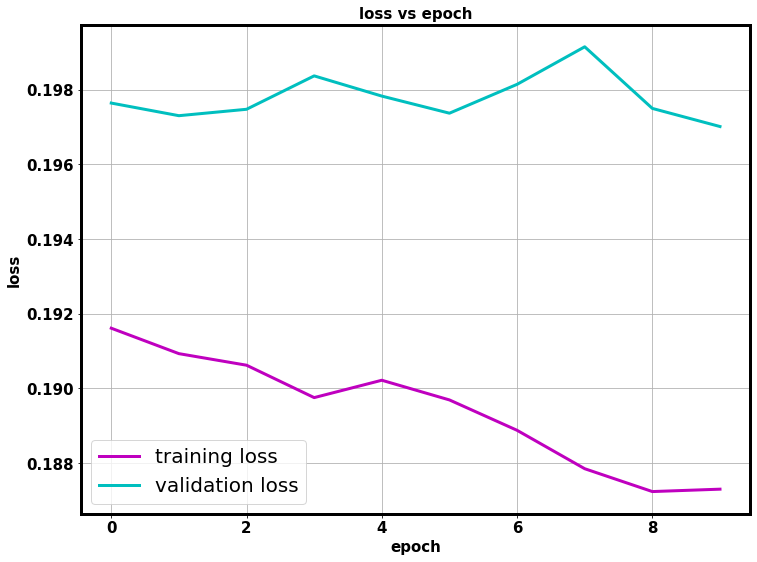

In [134]:
#Let us see how can changing batch size and epochs effect loss
#Reducing batch size
bs=128 #batch size
ep=10 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
)

#Plotting the loss
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.gcf().set_size_inches(12, 9)

Epoch 1/10
45/45 [==============================] - 1s 18ms/step - loss: 0.1830 - val_loss: 0.1962
Epoch 2/10
45/45 [==============================] - 1s 17ms/step - loss: 0.1805 - val_loss: 0.1961
Epoch 3/10
45/45 [==============================] - 1s 16ms/step - loss: 0.1800 - val_loss: 0.1970
Epoch 4/10
45/45 [==============================] - 1s 16ms/step - loss: 0.1789 - val_loss: 0.1963
Epoch 5/10
45/45 [==============================] - 1s 17ms/step - loss: 0.1779 - val_loss: 0.1964
Epoch 6/10
45/45 [==============================] - 1s 18ms/step - loss: 0.1775 - val_loss: 0.1963
Epoch 7/10
45/45 [==============================] - 1s 17ms/step - loss: 0.1769 - val_loss: 0.1966
Epoch 8/10
45/45 [==============================] - 1s 17ms/step - loss: 0.1760 - val_loss: 0.1962
Epoch 9/10
45/45 [==============================] - 1s 17ms/step - loss: 0.1762 - val_loss: 0.1958
Epoch 10/10
45/45 [==============================] - 1s 17ms/step - loss: 0.1751 - val_loss: 0.1960


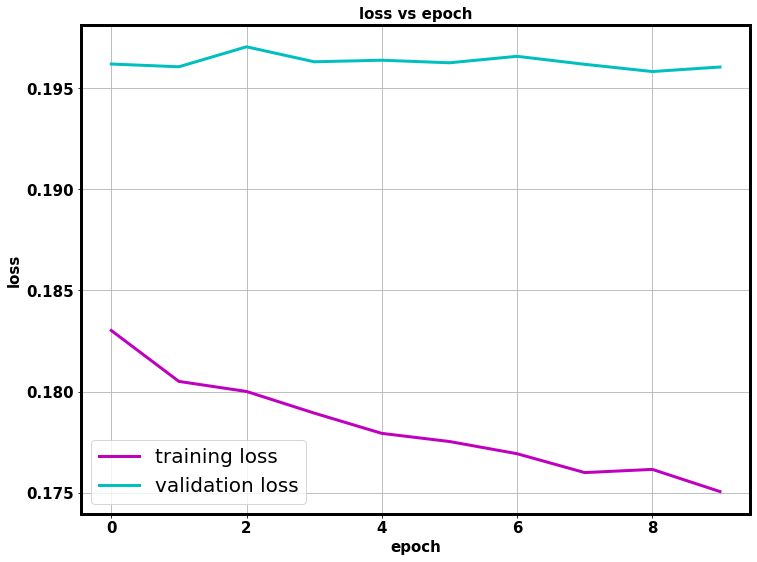

In [135]:
#Let us see how can changing batch size and epochs effect loss
#Increasing batch size
bs=512 #batch size
ep=10 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
)

#Plotting the loss
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.gcf().set_size_inches(12, 9)

Epoch 1/20
90/90 [==============================] - 1s 10ms/step - loss: 0.1790 - val_loss: 0.1968
Epoch 2/20
90/90 [==============================] - 1s 10ms/step - loss: 0.1785 - val_loss: 0.1977
Epoch 3/20
90/90 [==============================] - 1s 9ms/step - loss: 0.1771 - val_loss: 0.1967
Epoch 4/20
90/90 [==============================] - 1s 10ms/step - loss: 0.1766 - val_loss: 0.1967
Epoch 5/20
90/90 [==============================] - 1s 9ms/step - loss: 0.1757 - val_loss: 0.1976
Epoch 6/20
90/90 [==============================] - 1s 9ms/step - loss: 0.1753 - val_loss: 0.1970
Epoch 7/20
90/90 [==============================] - 1s 10ms/step - loss: 0.1733 - val_loss: 0.1978
Epoch 8/20
90/90 [==============================] - 1s 10ms/step - loss: 0.1722 - val_loss: 0.1997
Epoch 9/20
90/90 [==============================] - 1s 9ms/step - loss: 0.1717 - val_loss: 0.1973
Epoch 10/20
90/90 [==============================] - 1s 10ms/step - loss: 0.1710 - val_loss: 0.1966
Epoch 11/20
9

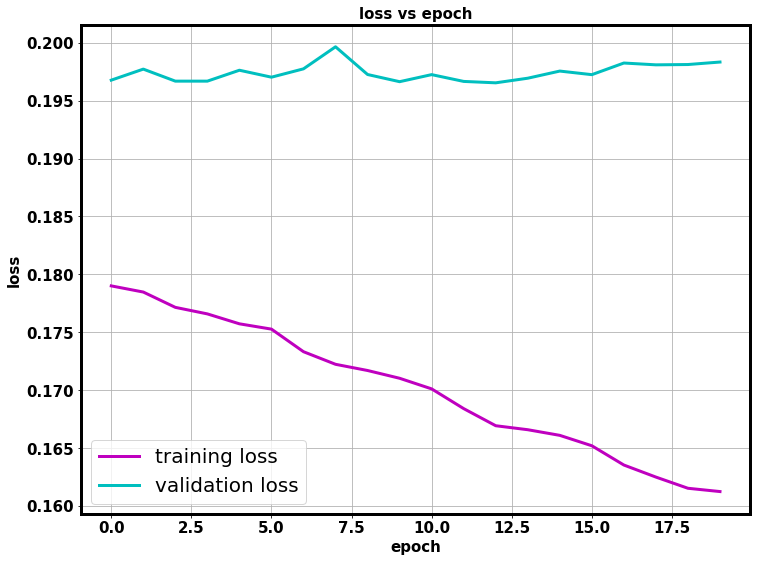

In [136]:
#Let us see how can changing batch size and epochs effect loss
#Increasing epoch
bs=256 #batch size
ep=20 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
)

#Plotting the loss
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.gcf().set_size_inches(12, 9)

In [137]:
#Changing epochs or batch size is not significantly changing the validation loss.
#Now let us try to see the effect of changing the number of neurons or increasing the depth of the model

Epoch 1/10
90/90 [==============================] - 1s 5ms/step - loss: 0.2123 - val_loss: 0.2028
Epoch 2/10
90/90 [==============================] - 0s 4ms/step - loss: 0.2010 - val_loss: 0.2009
Epoch 3/10
90/90 [==============================] - 0s 4ms/step - loss: 0.2000 - val_loss: 0.2006
Epoch 4/10
90/90 [==============================] - 0s 4ms/step - loss: 0.1982 - val_loss: 0.2003
Epoch 5/10
90/90 [==============================] - 0s 4ms/step - loss: 0.1978 - val_loss: 0.1995
Epoch 6/10
90/90 [==============================] - 0s 4ms/step - loss: 0.1984 - val_loss: 0.1990
Epoch 7/10
90/90 [==============================] - 0s 4ms/step - loss: 0.1967 - val_loss: 0.2009
Epoch 8/10
90/90 [==============================] - 0s 4ms/step - loss: 0.1969 - val_loss: 0.1999
Epoch 9/10
90/90 [==============================] - 0s 4ms/step - loss: 0.1959 - val_loss: 0.2000
Epoch 10/10
90/90 [==============================] - 0s 4ms/step - loss: 0.1963 - val_loss: 0.1996


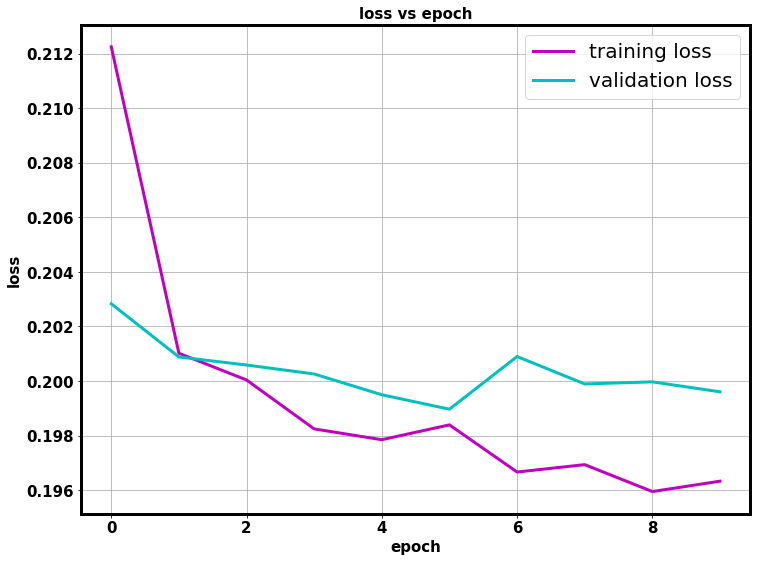

In [142]:
from tensorflow import keras
from tensorflow.keras import layers

#Decreasing the width of layers
neurons=256 #number of neurons

model = keras.Sequential([
    layers.Dense(neurons, activation='relu', input_shape=[12]),
    layers.Dense(neurons, activation='relu'),
    layers.Dense(neurons, activation='relu'),
    layers.Dense(1),
])

#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

bs=256 #batch size
ep=10 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
)

#Plotting the loss
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.gcf().set_size_inches(12, 9)

Epoch 1/10
90/90 [==============================] - 3s 33ms/step - loss: 0.2100 - val_loss: 0.2029
Epoch 2/10
90/90 [==============================] - 3s 33ms/step - loss: 0.2006 - val_loss: 0.2014
Epoch 3/10
90/90 [==============================] - 3s 32ms/step - loss: 0.1991 - val_loss: 0.2052
Epoch 4/10
90/90 [==============================] - 3s 32ms/step - loss: 0.1983 - val_loss: 0.1994
Epoch 5/10
90/90 [==============================] - 3s 35ms/step - loss: 0.1991 - val_loss: 0.2006
Epoch 6/10
90/90 [==============================] - 3s 33ms/step - loss: 0.1987 - val_loss: 0.1997
Epoch 7/10
90/90 [==============================] - 3s 33ms/step - loss: 0.1975 - val_loss: 0.2000
Epoch 8/10
90/90 [==============================] - 3s 38ms/step - loss: 0.1981 - val_loss: 0.2036
Epoch 9/10
90/90 [==============================] - 3s 33ms/step - loss: 0.1974 - val_loss: 0.1988
Epoch 10/10
90/90 [==============================] - 3s 36ms/step - loss: 0.1983 - val_loss: 0.2015


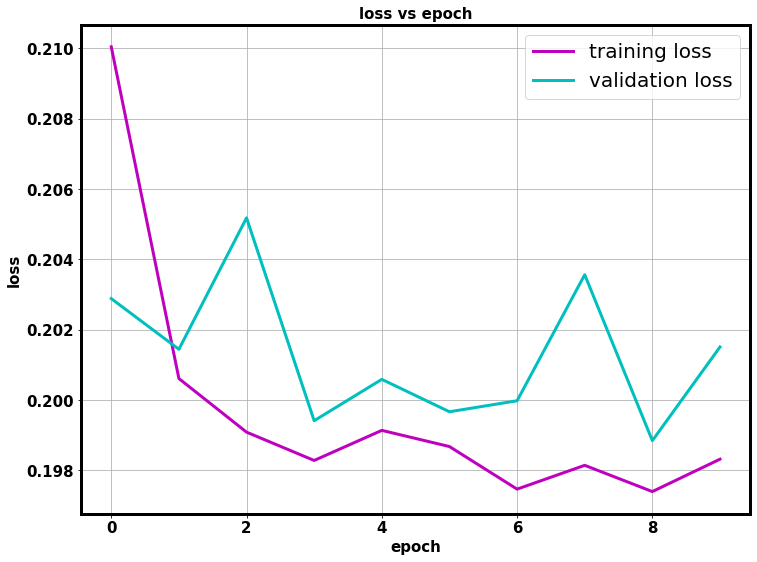

In [143]:
from tensorflow import keras
from tensorflow.keras import layers

#Increasing the width of layers
neurons=1024 #number of neurons

model = keras.Sequential([
    layers.Dense(neurons, activation='relu', input_shape=[12]),
    layers.Dense(neurons, activation='relu'),
    layers.Dense(neurons, activation='relu'),
    layers.Dense(1),
])

#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

bs=256 #batch size
ep=10 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
)

#Plotting the loss
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.gcf().set_size_inches(12, 9)

Epoch 1/10
90/90 [==============================] - 2s 14ms/step - loss: 0.2078 - val_loss: 0.2016
Epoch 2/10
90/90 [==============================] - 1s 13ms/step - loss: 0.2001 - val_loss: 0.2011
Epoch 3/10
90/90 [==============================] - 1s 13ms/step - loss: 0.1995 - val_loss: 0.1999
Epoch 4/10
90/90 [==============================] - 1s 13ms/step - loss: 0.1986 - val_loss: 0.2004
Epoch 5/10
90/90 [==============================] - 1s 13ms/step - loss: 0.1980 - val_loss: 0.1991
Epoch 6/10
90/90 [==============================] - 1s 14ms/step - loss: 0.1981 - val_loss: 0.1992
Epoch 7/10
90/90 [==============================] - 1s 14ms/step - loss: 0.1974 - val_loss: 0.2015
Epoch 8/10
90/90 [==============================] - 1s 13ms/step - loss: 0.1985 - val_loss: 0.2005
Epoch 9/10
90/90 [==============================] - 1s 13ms/step - loss: 0.1968 - val_loss: 0.2003
Epoch 10/10
90/90 [==============================] - 1s 16ms/step - loss: 0.1977 - val_loss: 0.2024


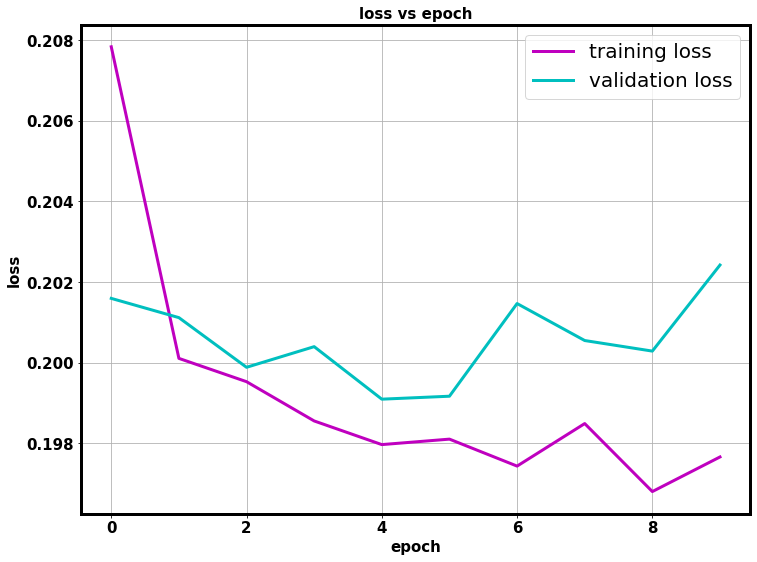

In [144]:
from tensorflow import keras
from tensorflow.keras import layers

#Increasing the depth of layers
neurons=512 #number of neurons

model = keras.Sequential([
    layers.Dense(neurons, activation='relu', input_shape=[12]),
    layers.Dense(neurons, activation='relu'),
    layers.Dense(neurons, activation='relu'),
    layers.Dense(neurons, activation='relu'),
    layers.Dense(1),
])

#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

bs=256 #batch size
ep=10 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
)

#Plotting the loss
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.gcf().set_size_inches(12, 9)

Epoch 1/10
90/90 [==============================] - 1s 7ms/step - loss: 0.2114 - val_loss: 0.2028
Epoch 2/10
90/90 [==============================] - 1s 6ms/step - loss: 0.1994 - val_loss: 0.2011
Epoch 3/10
90/90 [==============================] - 1s 6ms/step - loss: 0.1986 - val_loss: 0.2007
Epoch 4/10
90/90 [==============================] - 1s 6ms/step - loss: 0.1994 - val_loss: 0.1995
Epoch 5/10
90/90 [==============================] - 0s 5ms/step - loss: 0.1989 - val_loss: 0.2006
Epoch 6/10
90/90 [==============================] - 1s 6ms/step - loss: 0.1971 - val_loss: 0.2003
Epoch 7/10
90/90 [==============================] - 1s 7ms/step - loss: 0.1975 - val_loss: 0.2011
Epoch 8/10
90/90 [==============================] - 1s 7ms/step - loss: 0.1973 - val_loss: 0.2001
Epoch 9/10
90/90 [==============================] - 1s 6ms/step - loss: 0.1972 - val_loss: 0.1996
Epoch 10/10
90/90 [==============================] - 1s 6ms/step - loss: 0.1976 - val_loss: 0.2001


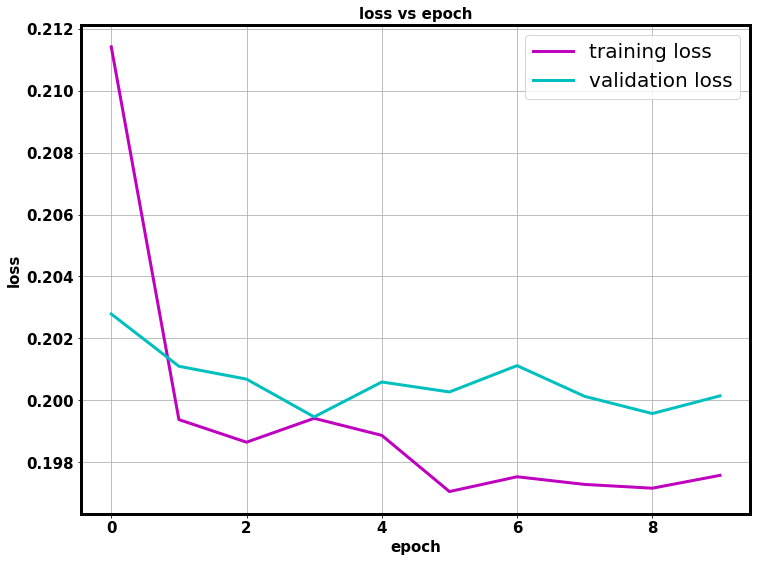

In [145]:
from tensorflow import keras
from tensorflow.keras import layers

#Decreasing the depth of layers
neurons=512 #number of neurons

model = keras.Sequential([
    layers.Dense(neurons, activation='relu', input_shape=[12]),
    layers.Dense(neurons, activation='relu'),
    layers.Dense(1),
])

#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

bs=256 #batch size
ep=10 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
)

#Plotting the loss
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.gcf().set_size_inches(12, 9)

In [146]:
#So changing the width or depth of the model does not change the efficacy of the model

Epoch 1/10
90/90 [==============================] - 2s 14ms/step - loss: 0.2116 - val_loss: 0.2018
Epoch 2/10
90/90 [==============================] - 1s 12ms/step - loss: 0.2014 - val_loss: 0.2071
Epoch 3/10
90/90 [==============================] - 1s 12ms/step - loss: 0.2006 - val_loss: 0.2079
Epoch 4/10
90/90 [==============================] - 1s 12ms/step - loss: 0.2008 - val_loss: 0.2028
Epoch 5/10
90/90 [==============================] - 1s 12ms/step - loss: 0.2011 - val_loss: 0.2042
Epoch 6/10
90/90 [==============================] - 1s 12ms/step - loss: 0.2004 - val_loss: 0.2021
Epoch 7/10
90/90 [==============================] - 1s 12ms/step - loss: 0.2010 - val_loss: 0.2028
Epoch 8/10
90/90 [==============================] - 1s 12ms/step - loss: 0.2004 - val_loss: 0.2043
Epoch 9/10
90/90 [==============================] - 1s 12ms/step - loss: 0.2002 - val_loss: 0.2011
Epoch 10/10
90/90 [==============================] - 1s 14ms/step - loss: 0.2004 - val_loss: 0.2023


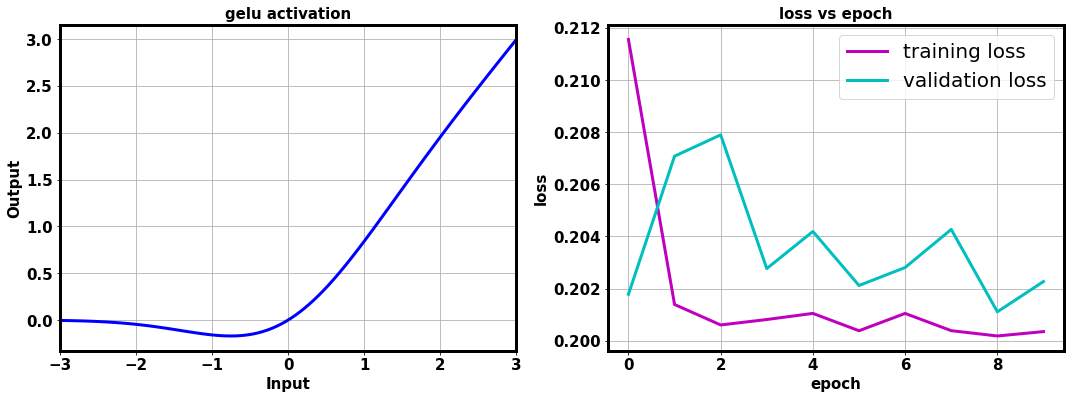

In [159]:
import tensorflow as tf
act='gelu' #activation type
#We want to try different types of activation
activation_layer = layers.Activation(act)

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function
plt.subplot(1,2,1)
#plt.figure(dpi=100)
plt.plot(x, y,color='b',linewidth=3)
plt.xlim(-3, 3)
plt.xlabel("Input", fontsize=fs, fontweight='bold')
plt.ylabel("Output", fontsize=fs, fontweight='bold')
plt.title(act+' activation', fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

#Decreasing the depth of layers
neurons=512 #number of neurons

model = keras.Sequential([
    layers.Dense(neurons, activation=act, input_shape=[12]),
    layers.Dense(neurons, activation=act),
    layers.Dense(neurons, activation=act),
    layers.Dense(1),
])

#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

bs=256 #batch size
ep=10 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
)

#Plotting the loss
plt.subplot(1,2,2)
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.gcf().set_size_inches(18,6)
plt.show()

Epoch 1/10
90/90 [==============================] - 1s 11ms/step - loss: 0.4162 - val_loss: 0.2060
Epoch 2/10
90/90 [==============================] - 1s 10ms/step - loss: 0.2024 - val_loss: 0.2056
Epoch 3/10
90/90 [==============================] - 1s 10ms/step - loss: 0.2010 - val_loss: 0.2047
Epoch 4/10
90/90 [==============================] - 1s 10ms/step - loss: 0.2019 - val_loss: 0.2010
Epoch 5/10
90/90 [==============================] - 1s 10ms/step - loss: 0.2007 - val_loss: 0.2016
Epoch 6/10
90/90 [==============================] - 1s 10ms/step - loss: 0.2008 - val_loss: 0.2003
Epoch 7/10
90/90 [==============================] - 1s 11ms/step - loss: 0.2003 - val_loss: 0.2012
Epoch 8/10
90/90 [==============================] - 1s 11ms/step - loss: 0.2001 - val_loss: 0.2028
Epoch 9/10
90/90 [==============================] - 1s 10ms/step - loss: 0.2003 - val_loss: 0.2033
Epoch 10/10
90/90 [==============================] - 1s 10ms/step - loss: 0.1996 - val_loss: 0.2053


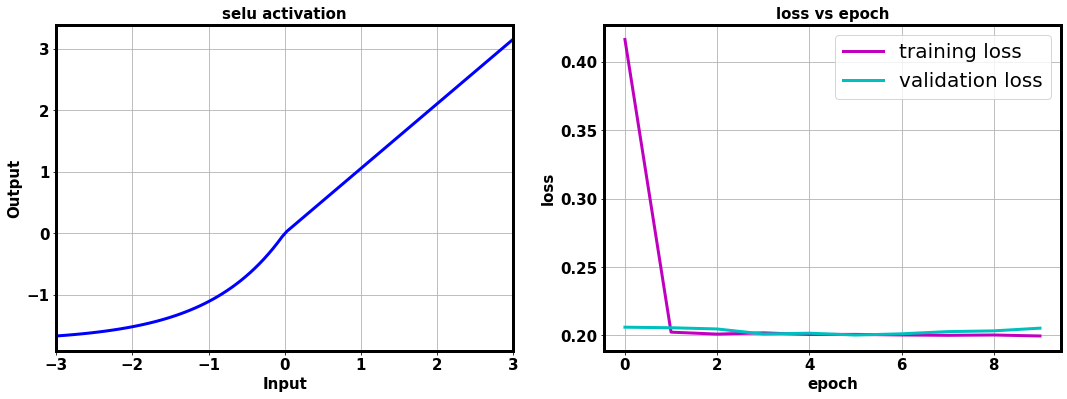

In [160]:
import tensorflow as tf
act='selu' #activation type
#We want to try different types of activation
activation_layer = layers.Activation(act)

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function
plt.subplot(1,2,1)
#plt.figure(dpi=100)
plt.plot(x, y,color='b',linewidth=3)
plt.xlim(-3, 3)
plt.xlabel("Input", fontsize=fs, fontweight='bold')
plt.ylabel("Output", fontsize=fs, fontweight='bold')
plt.title(act+' activation', fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

#Decreasing the depth of layers
neurons=512 #number of neurons

model = keras.Sequential([
    layers.Dense(neurons, activation=act, input_shape=[12]),
    layers.Dense(neurons, activation=act),
    layers.Dense(neurons, activation=act),
    layers.Dense(1),
])

#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

bs=256 #batch size
ep=10 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
)

#Plotting the loss
plt.subplot(1,2,2)
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.gcf().set_size_inches(18,6)
plt.show()

Epoch 1/10
90/90 [==============================] - 2s 11ms/step - loss: 0.2572 - val_loss: 0.2024
Epoch 2/10
90/90 [==============================] - 1s 10ms/step - loss: 0.2022 - val_loss: 0.2080
Epoch 3/10
90/90 [==============================] - 1s 10ms/step - loss: 0.2021 - val_loss: 0.2035
Epoch 4/10
90/90 [==============================] - 1s 10ms/step - loss: 0.2018 - val_loss: 0.2056
Epoch 5/10
90/90 [==============================] - 1s 10ms/step - loss: 0.2023 - val_loss: 0.2050
Epoch 6/10
90/90 [==============================] - 1s 10ms/step - loss: 0.2012 - val_loss: 0.2029
Epoch 7/10
90/90 [==============================] - 1s 11ms/step - loss: 0.2023 - val_loss: 0.2031
Epoch 8/10
90/90 [==============================] - 1s 11ms/step - loss: 0.2011 - val_loss: 0.2079
Epoch 9/10
90/90 [==============================] - 1s 10ms/step - loss: 0.2015 - val_loss: 0.2033
Epoch 10/10
90/90 [==============================] - 1s 10ms/step - loss: 0.2008 - val_loss: 0.2025


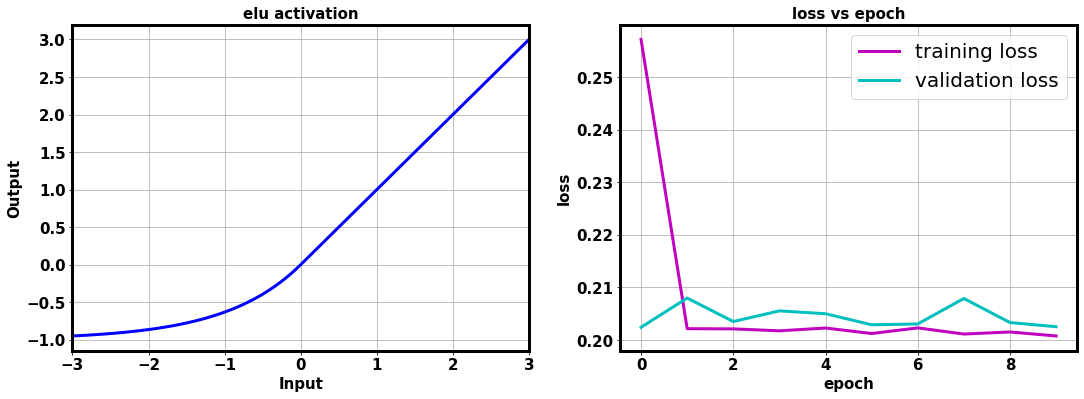

In [161]:
import tensorflow as tf
act='elu' #activation type
#We want to try different types of activation
activation_layer = layers.Activation(act)

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function
plt.subplot(1,2,1)
#plt.figure(dpi=100)
plt.plot(x, y,color='b',linewidth=3)
plt.xlim(-3, 3)
plt.xlabel("Input", fontsize=fs, fontweight='bold')
plt.ylabel("Output", fontsize=fs, fontweight='bold')
plt.title(act+' activation', fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

#Decreasing the depth of layers
neurons=512 #number of neurons

model = keras.Sequential([
    layers.Dense(neurons, activation=act, input_shape=[12]),
    layers.Dense(neurons, activation=act),
    layers.Dense(neurons, activation=act),
    layers.Dense(1),
])

#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

bs=256 #batch size
ep=10 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
)

#Plotting the loss
plt.subplot(1,2,2)
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.gcf().set_size_inches(18,6)
plt.show()

Epoch 1/10
90/90 [==============================] - 1s 12ms/step - loss: 0.2111 - val_loss: 0.2049
Epoch 2/10
90/90 [==============================] - 1s 13ms/step - loss: 0.2017 - val_loss: 0.2014
Epoch 3/10
90/90 [==============================] - 1s 11ms/step - loss: 0.2021 - val_loss: 0.2029
Epoch 4/10
90/90 [==============================] - 1s 11ms/step - loss: 0.2001 - val_loss: 0.2015
Epoch 5/10
90/90 [==============================] - 1s 11ms/step - loss: 0.2009 - val_loss: 0.2018
Epoch 6/10
90/90 [==============================] - 1s 12ms/step - loss: 0.2008 - val_loss: 0.2023
Epoch 7/10
90/90 [==============================] - 1s 12ms/step - loss: 0.2010 - val_loss: 0.2024
Epoch 8/10
90/90 [==============================] - 1s 11ms/step - loss: 0.2004 - val_loss: 0.2017
Epoch 9/10
90/90 [==============================] - 1s 11ms/step - loss: 0.2001 - val_loss: 0.2013
Epoch 10/10
90/90 [==============================] - 1s 11ms/step - loss: 0.2002 - val_loss: 0.2021


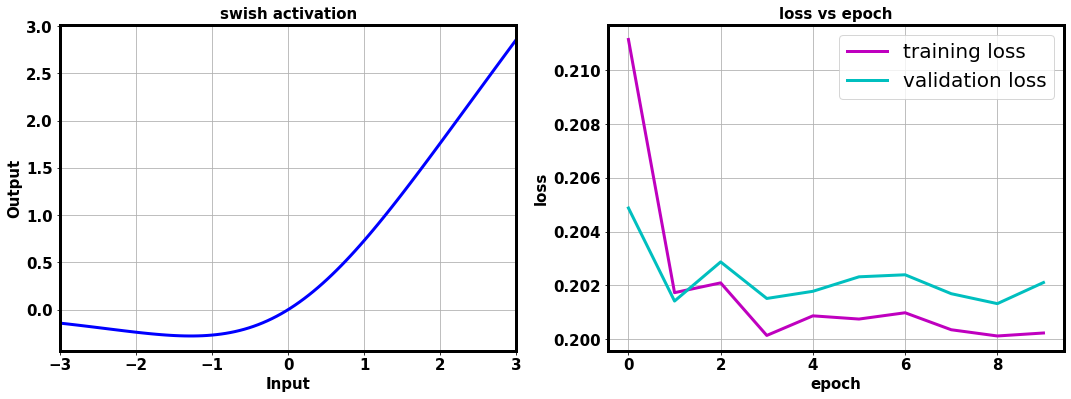

In [163]:
import tensorflow as tf
act='swish' #activation type
#We want to try different types of activation
activation_layer = layers.Activation(act)

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function
plt.subplot(1,2,1)
#plt.figure(dpi=100)
plt.plot(x, y,color='b',linewidth=3)
plt.xlim(-3, 3)
plt.xlabel("Input", fontsize=fs, fontweight='bold')
plt.ylabel("Output", fontsize=fs, fontweight='bold')
plt.title(act+' activation', fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

#Decreasing the depth of layers
neurons=512 #number of neurons

model = keras.Sequential([
    layers.Dense(neurons, activation=act, input_shape=[12]),
    layers.Dense(neurons, activation=act),
    layers.Dense(neurons, activation=act),
    layers.Dense(1),
])

#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

bs=256 #batch size
ep=10 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
)

#Plotting the loss
plt.subplot(1,2,2)
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.gcf().set_size_inches(18,6)
plt.show()

In [164]:
#Different type of activation also does not impact the validation loss significantly

Epoch 1/100
90/90 [==============================] - 1s 11ms/step - loss: 0.2127 - val_loss: 0.2026
Epoch 2/100
90/90 [==============================] - 1s 10ms/step - loss: 0.1996 - val_loss: 0.2012
Epoch 3/100
90/90 [==============================] - 1s 9ms/step - loss: 0.2003 - val_loss: 0.2000
Epoch 4/100
90/90 [==============================] - 1s 9ms/step - loss: 0.1983 - val_loss: 0.2065
Epoch 5/100
90/90 [==============================] - 1s 9ms/step - loss: 0.1981 - val_loss: 0.2000
Epoch 6/100
90/90 [==============================] - 1s 10ms/step - loss: 0.1984 - val_loss: 0.1994
Epoch 7/100
90/90 [==============================] - 1s 10ms/step - loss: 0.1979 - val_loss: 0.2009
Epoch 8/100
90/90 [==============================] - 1s 9ms/step - loss: 0.1978 - val_loss: 0.2005
Epoch 9/100
90/90 [==============================] - 1s 11ms/step - loss: 0.1976 - val_loss: 0.1999
Epoch 10/100
90/90 [==============================] - 1s 10ms/step - loss: 0.1967 - val_loss: 0.1991
Epo

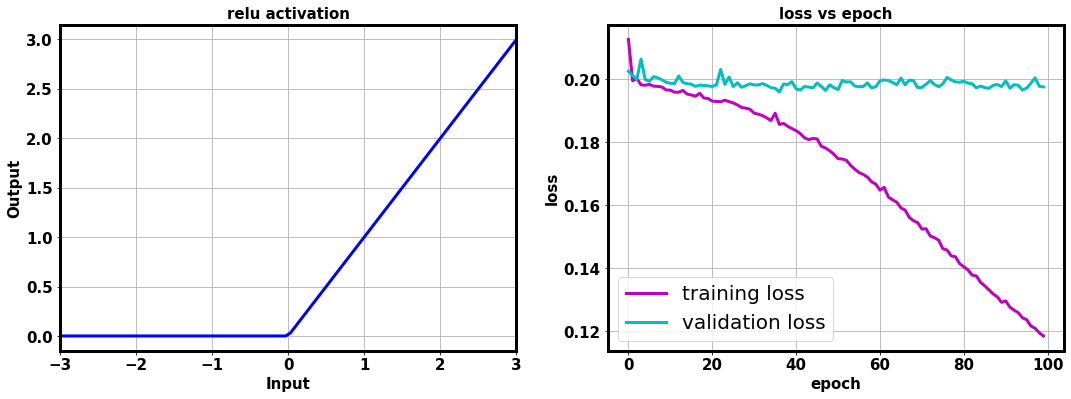

In [166]:
#In this part we analyse the effect of overfitting and how we can prevent it by early stopping method
#First we increase the number of epochs significantly and see what happens to losses

import tensorflow as tf
act='relu' #activation type
#We want to try different types of activation
activation_layer = layers.Activation(act)

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function
plt.subplot(1,2,1)
#plt.figure(dpi=100)
plt.plot(x, y,color='b',linewidth=3)
plt.xlim(-3, 3)
plt.xlabel("Input", fontsize=fs, fontweight='bold')
plt.ylabel("Output", fontsize=fs, fontweight='bold')
plt.title(act+' activation', fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

#Decreasing the depth of layers
neurons=512 #number of neurons

model = keras.Sequential([
    layers.Dense(neurons, activation=act, input_shape=[12]),
    layers.Dense(neurons, activation=act),
    layers.Dense(neurons, activation=act),
    layers.Dense(1),
])

#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

bs=256 #batch size
ep=100 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
)

#Plotting the loss
plt.subplot(1,2,2)
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.gcf().set_size_inches(18,6)
plt.show()

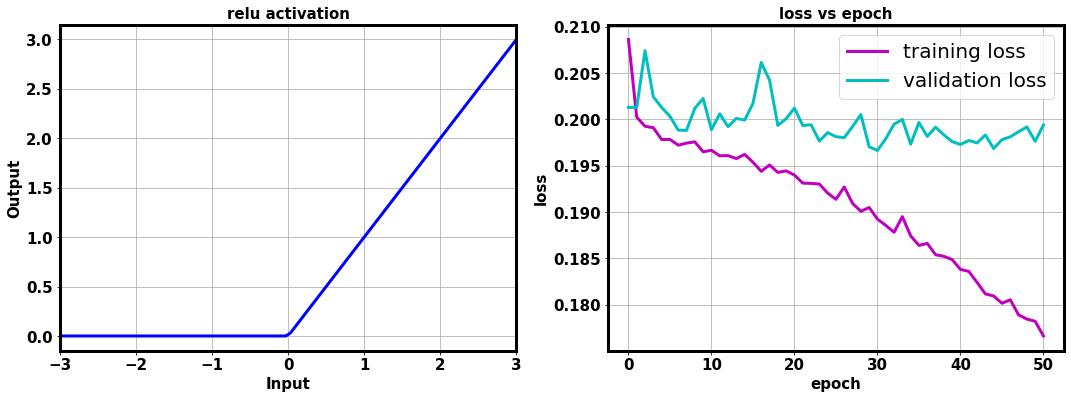

In [169]:
#Now it is clear from the plot above that the training data gains way more information about the noise after ~epoch 10
#This is not helpful and we would like to prevent it
#So we incorporate early stopping in our model which stops the model run if the validation loss stops decreasing
#In this part we analyse the effect of overfitting and how we can prevent it by early stopping method
#First we increase the number of epochs significantly and see what happens to losses

import tensorflow as tf
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

act='relu' #activation type
#We want to try different types of activation
activation_layer = layers.Activation(act)

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function
plt.subplot(1,2,1)
#plt.figure(dpi=100)
plt.plot(x, y,color='b',linewidth=3)
plt.xlim(-3, 3)
plt.xlabel("Input", fontsize=fs, fontweight='bold')
plt.ylabel("Output", fontsize=fs, fontweight='bold')
plt.title(act+' activation', fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

#Decreasing the depth of layers
neurons=512 #number of neurons

model = keras.Sequential([
    layers.Dense(neurons, activation=act, input_shape=[12]),
    layers.Dense(neurons, activation=act),
    layers.Dense(neurons, activation=act),
    layers.Dense(1),
])

#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

bs=256 #batch size
ep=100 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

#Plotting the loss
plt.subplot(1,2,2)
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.gcf().set_size_inches(18,6)
plt.show()

In [170]:
#So the above model stopped at epoch 50 instead of 100. We can see that the validation loss decreased till 
#epoch 50 in this case.
#Next we change the sensitivity from 0.001 to 0.01 and see what happens

Epoch 1/100
90/90 [==============================] - 1s 11ms/step - loss: 0.2056 - val_loss: 0.2011
Epoch 2/100
90/90 [==============================] - 1s 10ms/step - loss: 0.1992 - val_loss: 0.2041
Epoch 3/100
90/90 [==============================] - 1s 10ms/step - loss: 0.1995 - val_loss: 0.2014
Epoch 4/100
90/90 [==============================] - 1s 10ms/step - loss: 0.1984 - val_loss: 0.2018
Epoch 5/100
90/90 [==============================] - 1s 11ms/step - loss: 0.1992 - val_loss: 0.1995
Epoch 6/100
90/90 [==============================] - 1s 10ms/step - loss: 0.1977 - val_loss: 0.2021
Epoch 7/100
90/90 [==============================] - 1s 10ms/step - loss: 0.1972 - val_loss: 0.1993
Epoch 8/100
90/90 [==============================] - 1s 10ms/step - loss: 0.1971 - val_loss: 0.2015
Epoch 9/100
90/90 [==============================] - 1s 10ms/step - loss: 0.1970 - val_loss: 0.2014
Epoch 10/100
90/90 [==============================] - 1s 10ms/step - loss: 0.1973 - val_loss: 0.2006

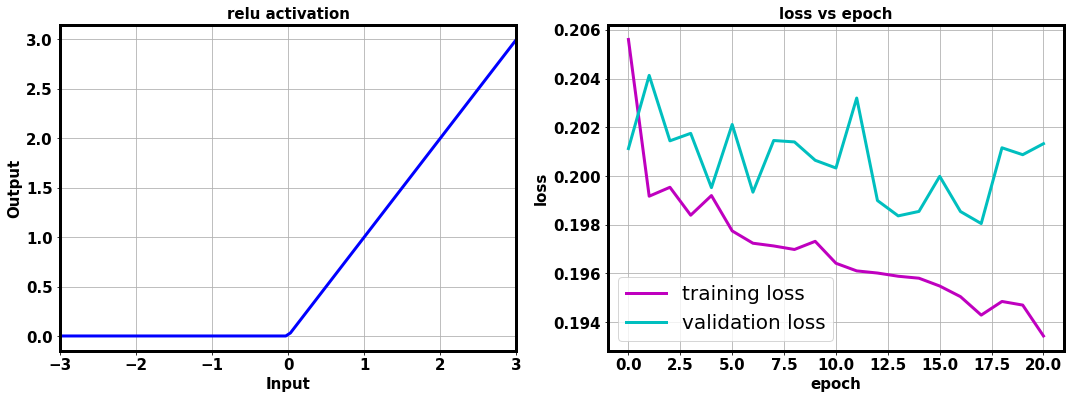

In [172]:
#Now it is clear from the plot above that the training data gains way more information about the noise after ~epoch 10
#This is not helpful and we would like to prevent it
#So we incorporate early stopping in our model which stops the model run if the validation loss stops decreasing
#In this part we analyse the effect of overfitting and how we can prevent it by early stopping method
#First we increase the number of epochs significantly and see what happens to losses

import tensorflow as tf
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

act='relu' #activation type
#We want to try different types of activation
activation_layer = layers.Activation(act)

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function
plt.subplot(1,2,1)
#plt.figure(dpi=100)
plt.plot(x, y,color='b',linewidth=3)
plt.xlim(-3, 3)
plt.xlabel("Input", fontsize=fs, fontweight='bold')
plt.ylabel("Output", fontsize=fs, fontweight='bold')
plt.title(act+' activation', fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

#Decreasing the depth of layers
neurons=512 #number of neurons

model = keras.Sequential([
    layers.Dense(neurons, activation=act, input_shape=[12]),
    layers.Dense(neurons, activation=act),
    layers.Dense(neurons, activation=act),
    layers.Dense(1),
])

#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

bs=256 #batch size
ep=100 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
    callbacks=[early_stopping], # put your callbacks in a list
    #verbose=0,  # turn off training log
)

#Plotting the loss
plt.subplot(1,2,2)
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.gcf().set_size_inches(18,6)
plt.show()

In [173]:
#We see in this case the model stops running as soon as possible. So it is important to tune min_delta and patience 
#to get the best possible results

Epoch 1/100
90/90 [==============================] - 2s 14ms/step - loss: 0.2194 - val_loss: 0.2107
Epoch 2/100
90/90 [==============================] - 1s 13ms/step - loss: 0.2054 - val_loss: 0.2126
Epoch 3/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2044 - val_loss: 0.2016
Epoch 4/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2028 - val_loss: 0.2024
Epoch 5/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2012 - val_loss: 0.2007
Epoch 6/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2010 - val_loss: 0.2010
Epoch 7/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2008 - val_loss: 0.2002
Epoch 8/100
90/90 [==============================] - 1s 13ms/step - loss: 0.2007 - val_loss: 0.2050
Epoch 9/100
90/90 [==============================] - 1s 13ms/step - loss: 0.2002 - val_loss: 0.2010
Epoch 10/100
90/90 [==============================] - 1s 13ms/step - loss: 0.1997 - val_loss: 0.1999

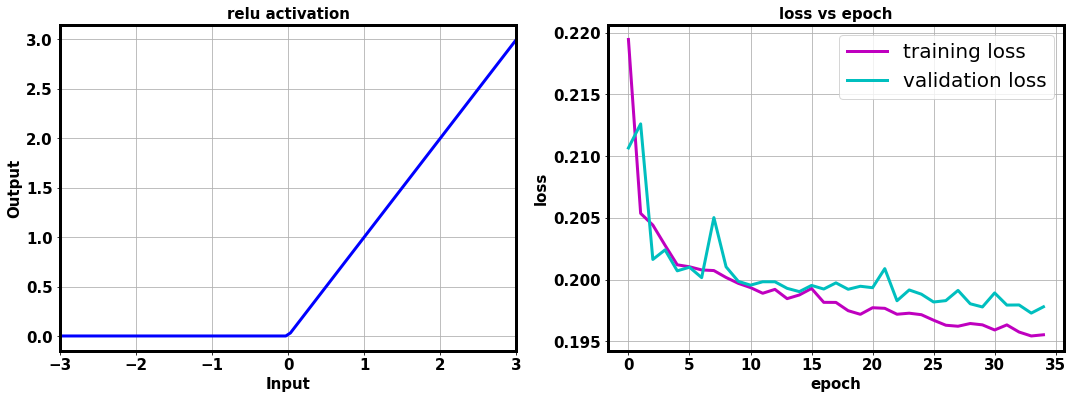

In [175]:
#We now see the effect of dropout and batch normalization on the accuracy
#First let's start with dropout rate which is the fraction neurons from each layer that is randomly dropped to avoid 
#learning noise

dr=0.3 #fraction of dropout

import tensorflow as tf
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.0025, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

act='relu' #activation type
#We want to try different types of activation
activation_layer = layers.Activation(act)

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function
plt.subplot(1,2,1)
#plt.figure(dpi=100)
plt.plot(x, y,color='b',linewidth=3)
plt.xlim(-3, 3)
plt.xlabel("Input", fontsize=fs, fontweight='bold')
plt.ylabel("Output", fontsize=fs, fontweight='bold')
plt.title(act+' activation', fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

#Decreasing the depth of layers
neurons=512 #number of neurons

model = keras.Sequential([
    layers.Dense(neurons, activation=act, input_shape=[12]),
    layers.Dropout(dr),
    layers.Dense(neurons, activation=act),
    layers.Dropout(dr),
    layers.Dense(neurons, activation=act),
    layers.Dropout(dr),
    layers.Dense(1),
])

#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

bs=256 #batch size
ep=100 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
    callbacks=[early_stopping], # put your callbacks in a list
    #verbose=0,  # turn off training log
)

#Plotting the loss
plt.subplot(1,2,2)
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.gcf().set_size_inches(18,6)
plt.show()

Epoch 1/100
90/90 [==============================] - 2s 13ms/step - loss: 0.2091 - val_loss: 0.2025
Epoch 2/100
90/90 [==============================] - 1s 13ms/step - loss: 0.2010 - val_loss: 0.2010
Epoch 3/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2005 - val_loss: 0.1999
Epoch 4/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2003 - val_loss: 0.2011
Epoch 5/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2000 - val_loss: 0.1998
Epoch 6/100
90/90 [==============================] - 1s 12ms/step - loss: 0.1988 - val_loss: 0.1997
Epoch 7/100
90/90 [==============================] - 1s 12ms/step - loss: 0.1990 - val_loss: 0.2002
Epoch 8/100
90/90 [==============================] - 1s 12ms/step - loss: 0.1985 - val_loss: 0.1990
Epoch 9/100
90/90 [==============================] - 1s 12ms/step - loss: 0.1979 - val_loss: 0.1994
Epoch 10/100
90/90 [==============================] - 1s 13ms/step - loss: 0.1978 - val_loss: 0.2000

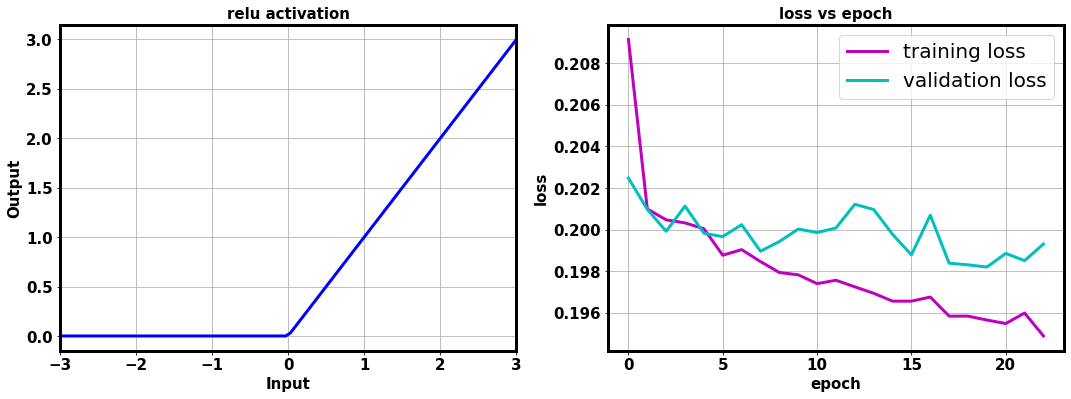

In [176]:
#Seems like randomly dropping 30% of values helped increasing accuracy. Lets see what happens when we drop 
#10%,50% and 90% of values

#Dropping 10% values

dr=0.1 #fraction of dropout


import tensorflow as tf
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.0025, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

act='relu' #activation type
#We want to try different types of activation
activation_layer = layers.Activation(act)

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function
plt.subplot(1,2,1)
#plt.figure(dpi=100)
plt.plot(x, y,color='b',linewidth=3)
plt.xlim(-3, 3)
plt.xlabel("Input", fontsize=fs, fontweight='bold')
plt.ylabel("Output", fontsize=fs, fontweight='bold')
plt.title(act+' activation', fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

#Decreasing the depth of layers
neurons=512 #number of neurons

model = keras.Sequential([
    layers.Dense(neurons, activation=act, input_shape=[12]),
    layers.Dropout(dr),
    layers.Dense(neurons, activation=act),
    layers.Dropout(dr),
    layers.Dense(neurons, activation=act),
    layers.Dropout(dr),
    layers.Dense(1),
])

#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

bs=256 #batch size
ep=100 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
    callbacks=[early_stopping], # put your callbacks in a list
    #verbose=0,  # turn off training log
)

#Plotting the loss
plt.subplot(1,2,2)
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.gcf().set_size_inches(18,6)
plt.show()

Epoch 1/100
90/90 [==============================] - 2s 13ms/step - loss: 0.2215 - val_loss: 0.2300
Epoch 2/100
90/90 [==============================] - 1s 13ms/step - loss: 0.2099 - val_loss: 0.2293
Epoch 3/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2061 - val_loss: 0.2087
Epoch 4/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2044 - val_loss: 0.2117
Epoch 5/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2039 - val_loss: 0.2050
Epoch 6/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2027 - val_loss: 0.2020
Epoch 7/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2019 - val_loss: 0.2021
Epoch 8/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2022 - val_loss: 0.2015
Epoch 9/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2013 - val_loss: 0.2009
Epoch 10/100
90/90 [==============================] - 1s 13ms/step - loss: 0.2012 - val_loss: 0.2007

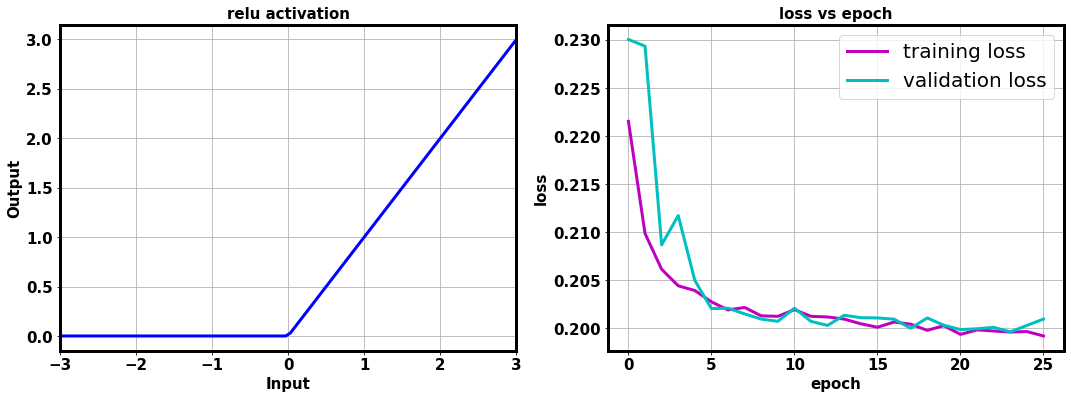

In [177]:
#Dropping 50% values

dr=0.5 #fraction of dropout


import tensorflow as tf
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.0025, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

act='relu' #activation type
#We want to try different types of activation
activation_layer = layers.Activation(act)

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function
plt.subplot(1,2,1)
#plt.figure(dpi=100)
plt.plot(x, y,color='b',linewidth=3)
plt.xlim(-3, 3)
plt.xlabel("Input", fontsize=fs, fontweight='bold')
plt.ylabel("Output", fontsize=fs, fontweight='bold')
plt.title(act+' activation', fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

#Decreasing the depth of layers
neurons=512 #number of neurons

model = keras.Sequential([
    layers.Dense(neurons, activation=act, input_shape=[12]),
    layers.Dropout(dr),
    layers.Dense(neurons, activation=act),
    layers.Dropout(dr),
    layers.Dense(neurons, activation=act),
    layers.Dropout(dr),
    layers.Dense(1),
])

#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

bs=256 #batch size
ep=100 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
    callbacks=[early_stopping], # put your callbacks in a list
    #verbose=0,  # turn off training log
)

#Plotting the loss
plt.subplot(1,2,2)
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.gcf().set_size_inches(18,6)
plt.show()

Epoch 1/100
90/90 [==============================] - 2s 14ms/step - loss: 0.4678 - val_loss: 0.2690
Epoch 2/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2294 - val_loss: 0.2106
Epoch 3/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2159 - val_loss: 0.2093
Epoch 4/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2131 - val_loss: 0.2094
Epoch 5/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2122 - val_loss: 0.2089
Epoch 6/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2120 - val_loss: 0.2089
Epoch 7/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2111 - val_loss: 0.2090
Epoch 8/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2105 - val_loss: 0.2090
Epoch 9/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2100 - val_loss: 0.2088
Epoch 10/100
90/90 [==============================] - 1s 12ms/step - loss: 0.2097 - val_loss: 0.2087

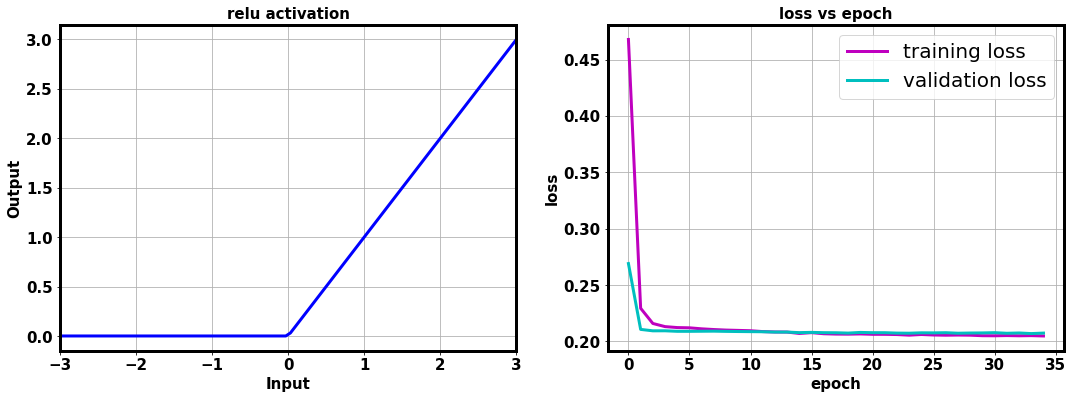

In [178]:
#Dropping 90% values

dr=0.9 #fraction of dropout


import tensorflow as tf
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.0025, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

act='relu' #activation type
#We want to try different types of activation
activation_layer = layers.Activation(act)

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function
plt.subplot(1,2,1)
#plt.figure(dpi=100)
plt.plot(x, y,color='b',linewidth=3)
plt.xlim(-3, 3)
plt.xlabel("Input", fontsize=fs, fontweight='bold')
plt.ylabel("Output", fontsize=fs, fontweight='bold')
plt.title(act+' activation', fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

#Decreasing the depth of layers
neurons=512 #number of neurons

model = keras.Sequential([
    layers.Dense(neurons, activation=act, input_shape=[12]),
    layers.Dropout(dr),
    layers.Dense(neurons, activation=act),
    layers.Dropout(dr),
    layers.Dense(neurons, activation=act),
    layers.Dropout(dr),
    layers.Dense(1),
])

#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

bs=256 #batch size
ep=100 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
    callbacks=[early_stopping], # put your callbacks in a list
    #verbose=0,  # turn off training log
)

#Plotting the loss
plt.subplot(1,2,2)
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.gcf().set_size_inches(18,6)
plt.show()

Epoch 1/100
90/90 [==============================] - 3s 20ms/step - loss: 0.6727 - val_loss: 0.2084
Epoch 2/100
90/90 [==============================] - 2s 19ms/step - loss: 0.3246 - val_loss: 0.2075
Epoch 3/100
90/90 [==============================] - 2s 20ms/step - loss: 0.2449 - val_loss: 0.2046
Epoch 4/100
90/90 [==============================] - 2s 19ms/step - loss: 0.2242 - val_loss: 0.2020
Epoch 5/100
90/90 [==============================] - 2s 19ms/step - loss: 0.2137 - val_loss: 0.2006
Epoch 6/100
90/90 [==============================] - 2s 20ms/step - loss: 0.2090 - val_loss: 0.1995
Epoch 7/100
90/90 [==============================] - 2s 21ms/step - loss: 0.2050 - val_loss: 0.2010
Epoch 8/100
90/90 [==============================] - 2s 20ms/step - loss: 0.2061 - val_loss: 0.2001
Epoch 9/100
90/90 [==============================] - 2s 19ms/step - loss: 0.2047 - val_loss: 0.1989
Epoch 10/100
90/90 [==============================] - 2s 19ms/step - loss: 0.2025 - val_loss: 0.1988

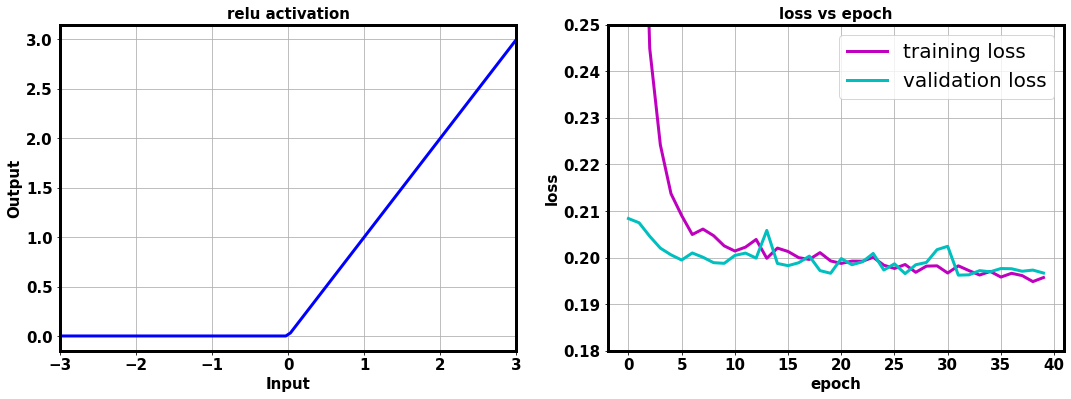

In [181]:
#30% seems to be a good dropout rate
#Now we incorporate batch normalisation - A batch normalization layer looks at each batch as it comes in, 
#first normalizing the batch with its own mean and standard deviation, 
#and then also putting the data on a new scale with two trainable rescaling parameters

#Dropping 30% values

dr=0.3 #fraction of dropout


import tensorflow as tf
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.0025, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

act='relu' #activation type
#We want to try different types of activation
activation_layer = layers.Activation(act)

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function
plt.subplot(1,2,1)
#plt.figure(dpi=100)
plt.plot(x, y,color='b',linewidth=3)
plt.xlim(-3, 3)
plt.xlabel("Input", fontsize=fs, fontweight='bold')
plt.ylabel("Output", fontsize=fs, fontweight='bold')
plt.title(act+' activation', fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
ax = plt.gca()
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

#Decreasing the depth of layers
neurons=512 #number of neurons

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[12]),
    layers.Dense(neurons, activation=act, input_shape=[12]),
    layers.Dropout(dr),
    layers.BatchNormalization(),
    layers.Dense(neurons, activation=act),
    layers.Dropout(dr),
    layers.BatchNormalization(),
    layers.Dense(neurons, activation=act),
    layers.Dropout(dr),
    layers.BatchNormalization(),
    layers.Dense(1),
])

#Choosing optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

bs=256 #batch size
ep=100 #epochs
#Running the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=bs,
    epochs=ep,
    callbacks=[early_stopping], # put your callbacks in a list
    #verbose=0,  # turn off training log
)

#Plotting the loss
plt.subplot(1,2,2)
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt1=history_df['loss'].plot(color='m',linewidth=3);
plt2=history_df['val_loss'].plot(color='c',linewidth=3);
plt.xlabel("epoch", fontsize=fs, fontweight='bold')
plt.ylabel("loss", fontsize=fs, fontweight='bold')
plt.title("loss vs epoch", fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.grid()
plt.ylim(0.18, 0.25)
ax = plt.gca()
ax.legend(['training loss','validation loss'],fontsize=20)
#ax.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)


plt.gcf().set_size_inches(18,6)
plt.show()

# Batch normalization marginally improves the performance